###  Testing

In [2]:
import numpy as np

from PIL import Image
from matplotlib import cm
im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))

NameError: name 'myarray' is not defined

In [10]:
img = Image.open('./RZ417tile00_transmAND2pec_merged_cropped.tif')

nimg = np.array(img)

In [11]:
nimg.shape

(329, 513, 3)

In [7]:
import imageio

img = imageio.imread('./RZ417tile00_transmAND2pec_merged_cropped.tif')


In [9]:
img.shape,img.dtype

((329, 513, 3), dtype('uint8'))

In [ ]:
images[0].save('anitest.gif',
               save_all=True,
               append_images=[Image.fromarray(img[ii,:,:]) ] ,
               duration=20,
               loop=0)

## Else

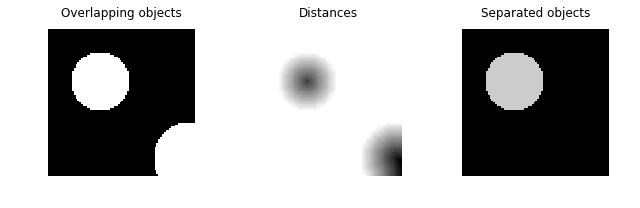

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 70, 77
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()

In [33]:
distance.shape

(80, 80)

## Demo Sigmoid, fiber clustering

<Container object of 100 artists>

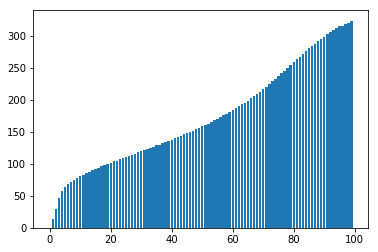

In [2]:
import matplotlib.pyplot as plt


from skimage import io
import numpy as np

cc=('/home/kiks/projects/Dendrites/data/rZn09a.09Atlas_Cyc10_607em_STK_decon_mathes___div in sig_THRES.tif')

dd = io.imread(cc)

percs=np.percentile(dd,np.arange(100))

plt.bar(range(100),percs)






In [4]:
ax,ay,az = np.where(dd<50)


choices = np.random.choice(ax.shape[0],500,replace=False)

ax.shape[0]/np.product(dd.shape)

0.031664964551718681

In [38]:
dd.shape

(599, 1024, 1024)

In [5]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

def makeas(img,ax,ay,az):
    zeroR = np.zeros(img.shape,dtype=img.dtype)
    zeroR[ax,ay,az] = 1
    return zeroR




In [6]:
subs = dd[400:600,100:600,200:800]

# from skimage.feature import peak_local_min
mask_maxi = (subs<50).astype(bool)
ax,ay,az = np.where(subs<50)
choices = np.random.choice(ax.shape[0],80,replace=False)

maxs_small = makeas(subs,ax[choices],
                    ay[choices],az[choices])


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(mask_maxi
                                     )
# local_maxi = peak_local_max(distance.max()-distance, indices=False, footprint=np.ones((3, 3)),
#                             labels=subs)




markers = ndi.label(maxs_small)[0]
labels = watershed(-distance, markers, mask=subs)

labels.shape

(199, 500, 600)

In [61]:
io.imsave('img_sub2.tif',subs)

/home/kiks/miniconda3/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: img_sub2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [15]:
io.imsave('img_labels3.tif',labels)

/home/kiks/miniconda3/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: img_labels3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [16]:
io.imsave('img_distance2.tif',distance.astype(np.uint8))

/home/kiks/miniconda3/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: img_distance2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [ ]:
io.imsave('img_maskmax.tif',mamask_maximaxi)

In [11]:
mask_maxi = (subs<50).astype(bool)
ax,ay,az = np.where(subs<50)
choices = np.random.choice(ax.shape[0],80,replace=False)

maxs_small = makeas(subs,ax[choices],
                    ay[choices],az[choices])

np.sum(maxs_small)

80

In [ ]:
markers = ndi.label(maxs_small)[0]
labels = watershed(subs, markers, mask=subs)

labels

## ML ROI Cluster Processing

In [1]:
import matplotlib.pyplot as plt


from skimage import io
import numpy as np

cc=('/home/kiks/projects/Dendrites/data/rZn09a.09Atlas_Cyc10_607em_STK_decon_mathes___div in sig_THRES.tif')

dd = io.imread(cc)

percs=np.percentile(dd,np.arange(100))

plt.bar(range(100),percs)






<Container object of 100 artists>

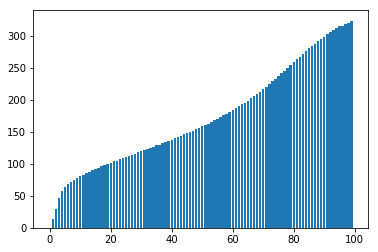

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


from skimage import io
import numpy as np
rawpath = ('/home/kiks/projects/Dendrites/data/rZn09a.09Atlas_Cyc10_607em_STK_decon_mathes___div in sig_THRES.tif')

rawimage = io.imread(rawpath)

percsraw = np.percentile(rawimage,np.arange(100))

plt.bar(range(100),percsraw)
rawimage = None



In [2]:
subs = dd[400:700,100:800,100:800]


In [3]:
dd= None

In [4]:
from itertools import product

valDim=lambda xx,ii,imgs:( xx+ii if xx+ii>=0 and xx+ii<imgs else \
            (0 if xx+ii<0 else imgs-1))

def draw_more(img,cord_row,val=1,windowspan=2):
    fro,to = -(windowspan-1),windowspan
    xx,yy,zz = cord_row

    for ii,jj,kk in product( *([np.arange(fro,to)]*3) ):
        xN=valDim(xx,ii,img.shape[0])
        yN=valDim(yy,jj,img.shape[1])
        zN=valDim(zz,kk,img.shape[2])

        
        img[xN,yN,zN ] = val 

def draw_model_labels(coords,mlabels, NCOLS=80, 
                      cols=None, axes=None,
                      marker='o',sBall=1,imgbase=None,windowspan=2):
    
    ax,ay,az= [coords[:,iarr] for iarr in range(coords.shape[1])]

    if axes is None:
        fig = plt.figure()
        axes = fig.add_subplot(111, projection='3d')


    lab_mod = list(set(mlabels))
    lab_mod.sort(key=lambda x: -np.sum(mlabels==x))
    
    for iml,ml in enumerate(lab_mod):
        if ml==-1:
            continue
            
        pinds = mlabels==ml
        axes.scatter(ax[pinds],ay[pinds],az[pinds],
                     c=cols[ml%len(cols)],s=sBall,
                    marker=marker
                    )
        
        if imgbase is not None:
            
            [draw_more(imgbase,cord_row,val=cols[ml%len(cols)],
                      windowspan=windowspan)
            for cord_row in coords]
#             imgbase[
#                 ax[pinds],ay[pinds]
#                 ,az[pinds]] = cols[ml%len(cols)]
        
    #     print(ml)

        if iml>=100:
            break
            
    return axes
def makeas(img,ax,ay,az):
    zeroR = np.zeros(img.shape,dtype=img.dtype)
    zeroR[ax,ay,az] = 1
    return zeroR


<IPython.core.display.Javascript object>


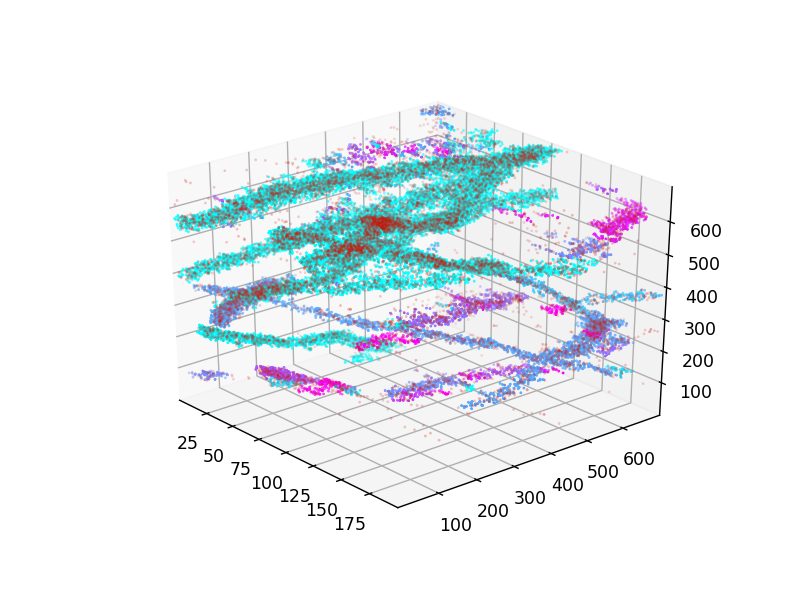

In [16]:
%matplotlib notebook
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn.cluster import DBSCAN, OPTICS
import matplotlib.cm as cm
import numpy as np

np.random.seed(777)

# maxs_small = makeas(subs,axx[choices],
#                     ay[choices],az[choices])
# axx,ay,az = np.where(maxs_small)




# subs = dd[400:700,100:800,100:800]



mask_maxi = (subs<50).astype(bool)
axx,ay,az = np.where(subs<20)
choices = np.random.choice(axx.shape[0],14000,replace=False)
pred_choices = np.random.choice(axx.shape[0],8000,replace=False)




# ----------------
ponts = np.concatenate((axx[choices].reshape(-1,1),
                        ay[choices].reshape(-1,1),
                        az[choices].reshape(-1,1)),axis=1)

pred_ponts = np.concatenate((axx[pred_choices].reshape(-1,1),
                        ay[pred_choices].reshape(-1,1),
                        az[pred_choices].reshape(-1,1)),axis=1)


model = DBSCAN(eps=10, min_samples=5)
# model = OPTICS(max_eps=15, min_samples=8)


# model.fit(ponts)
# print(set(model.labels_))




# predicted_labels = model.fit_predict(pred_ponts)


# predCols = cm.tab10(np.linspace(0,1,80 ))
# predCols[:,-1] = 1
# axes = draw_model_labels(pred_ponts,predicted_labels,
#                   cols= predCols
#                          ,sBall=1,
#                          imgbase= None
#                  )



axx,ay,az = np.where(subs<50)
test_choices = np.random.choice(axx.shape[0],25500,replace=False)

test_ponts = np.concatenate((axx[test_choices].reshape(-1,1),
                        ay[test_choices].reshape(-1,1),
                        az[test_choices].reshape(-1,1)),axis=1)
tested_labels = model.fit_predict(test_ponts)


creds =[[0.8,0.1,0.05,0.3]]
testCols =  cm.cool(np.linspace(0.01,1,10 ))
testCols[:,-1] = 1




axx,ay,az = np.where(subs<50)
val_choices = np.random.choice(axx.shape[0],12500,replace=False)
val_ponts = np.concatenate((axx[val_choices].reshape(-1,1),
                        ay[val_choices].reshape(-1,1),
                        az[val_choices].reshape(-1,1)),axis=1)

axes = draw_model_labels(val_ponts,np.zeros(val_ponts.shape[0],dtype=int),
                  cols= creds,
                  axes=None,sBall=0.5,marker='*',
                  imgbase=None
                 )

draw_model_labels(test_ponts,tested_labels,
                  cols= testCols,
                  axes=axes,sBall=0.5,marker='*',
                  imgbase=None

                 )




# cols= cm.viridis(np.linspace(0,1,max(model.labels_)+1  ))
# axes.scatter(axx,ay,az,c=[cols[ml] for ml in model.labels_ ] )


# axes.scatter(axx[choices],ay[choices],
#              az[choices],marker='^',s=0.15,color='red')

<IPython.core.display.Javascript object>


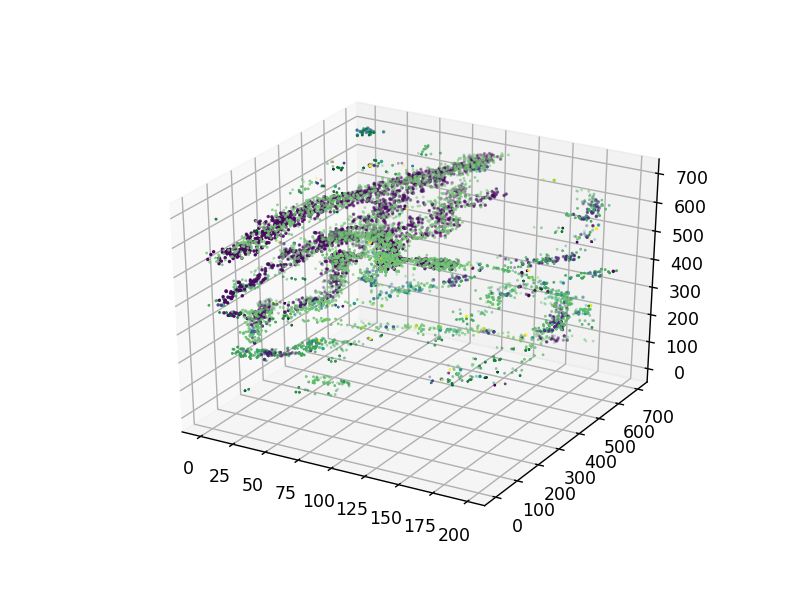

at least drew one...
at least drew two...


In [6]:
base_draw = np.zeros(subs.shape+(4,),dtype=np.float32)
base_draw[:,:,:,0] = subs.copy()
base_draw[:,:,:,1] = subs.copy()
base_draw[:,:,:,2] = subs.copy()
base_draw[:,:,:,3] = subs.max()

base_draw /= base_draw.max()


axes = draw_model_labels(pred_ponts[:3000],
                         predicted_labels[:3000],
                  cols= cm.viridis(np.linspace(0,1,100))
                         ,sBall=1,
                         imgbase= base_draw
                 )
print('at least drew one...')
# draw_model_labels(val_ponts[:9000],np.zeros(9000,dtype=int),
#                   cols= creds,
#                   axes=axes,sBall=0.5,marker='*',
#                   imgbase=base_draw,
#                   windowspan=3
#                  )
print('at least drew two...')

draw_model_labels(test_ponts[:4000],tested_labels[:4000],
                  cols= cm.Greens(np.linspace(0.5,1,100)),
                  axes=axes,sBall=0.5,marker='*',
                  imgbase=base_draw,
                  windowspan=2
                 )


In [7]:
io.imsave('../data/sub-roipoints.tif',(255*base_draw).astype(np.uint8))

In [11]:
subs.dtype

dtype('uint16')

In [76]:
test_ponts.max(axis=0),test_ponts.min(axis=0)

(array([198, 499, 599]), array([0, 0, 0]))

/home/kiks/miniconda3/envs/py-dendrite/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/sub-roipoints.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [21]:
pred_ponts.shape

(8000, 3)

In [29]:
max(model.labels_)

74

(array([  58.,  117.,  173.,  194.,  172.,  121.,   88.,   55.,   19.,    3.]),
 array([   5.47722558,   69.05422524,  132.6312249 ,  196.20822457,
         259.78522423,  323.3622239 ,  386.93922356,  450.51622322,
         514.09322289,  577.67022255,  641.24722222]),
 <a list of 10 Patch objects>)

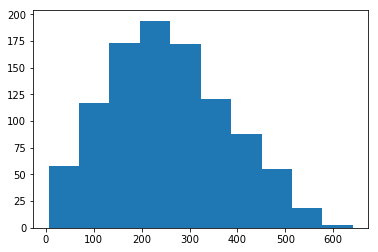

In [20]:
%matplotlib inline

euc_dist = lambda x,y: np.sqrt(np.sum([ (xx-yy)**2  for xx,yy in zip(x,y)]))

dists=[]
for ii in range(1000):
    jj,xx = np.random.choice(5000,2,replace=False)
    dists.append( euc_dist(ponts[jj],ponts[xx])  )
    

plt.hist(dists)

In [17]:
dists

[array([ 6.8556546 ,  7.41619849,  9.79795897]),
 array([ nan,  nan,  nan]),
 array([ 12.4498996 ,          nan,   3.87298335]),
 array([         nan,          nan,  10.77032961]),
 array([        nan,         nan,  4.89897949]),
 array([  9.38083152,  10.77032961,          nan]),
 array([         nan,          nan,  12.36931688]),
 array([  4.24264069,  10.29563014,  18.13835715]),
 array([  8.48528137,          nan,  14.89966443]),
 array([         nan,          nan,  13.03840481]),
 array([ 2.        ,  3.74165739,         nan]),
 array([  2.,  nan,  nan]),
 array([  4.58257569,  14.69693846,  17.34935157]),
 array([         nan,  11.26942767,          nan]),
 array([ 2.44948974,         nan,         nan]),
 array([         nan,          nan,  20.76053949]),
 array([         nan,          nan,  20.46948949]),
 array([  6.8556546 ,  16.        ,  14.83239697]),
 array([         nan,   9.94987437,  15.77973384]),
 array([ 4.58257569,         nan,         nan]),
 array([  6.92820323,  

In [10]:
axx.shape

(5000,)

In [19]:
axx.shape[0]/60018798,subs.shape

(0.03834691924353433, (199, 500, 600))

In [18]:
199*501*602

60018798